In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import math
import numpy as np
import matplotlib.patches as patches

In [2]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [3]:
df.tail()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age
18236,1000,00:03:33.250000,Noureddine Morceli,ALG,1970-02-28,1.0,Moskva,1995-06-05,Men,1500 m,213.25,25.282192
18237,1000,00:03:33.250000,Paul Korir,KEN,1977-07-15,5.0,Zürich,2003-08-15,Men,1500 m,213.25,26.101370
18238,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m,213.25,28.523288
18239,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m,213.25,22.263014
18240,1000,00:03:33.250000,Bethwell Birgen,KEN,1988-08-06,7.0,Lausanne,2012-08-23,Men,1500 m,213.25,24.063014


In [4]:
#Add a column with only year
df['Year'] = df['Date'].dt.year

# List all unique events in the df
unique_events = df['Event'].unique()

# Set the style for the plots
sns.set(style="whitegrid")

# Filter and sort the events based on Olympic distances and half marathon
sorted_events = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half marathon', 'Marathon']

# Hide a particular outlayer datapoint
# df.loc[df['Time_s'] == 862.47, 'Time_s'] = np.nan
# df.loc[df['Time_s'] == 871.76, 'Time_s'] = np.nan
# df.loc[df['Time_s'] == 876.84, 'Time_s'] = np.nan


In [5]:
df.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age,Year
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,100.91,23.742466,2012
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,101.01,21.712329,2010
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,101.09,21.693151,2010
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,101.11,26.717808,1997
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,101.24,26.687671,1997


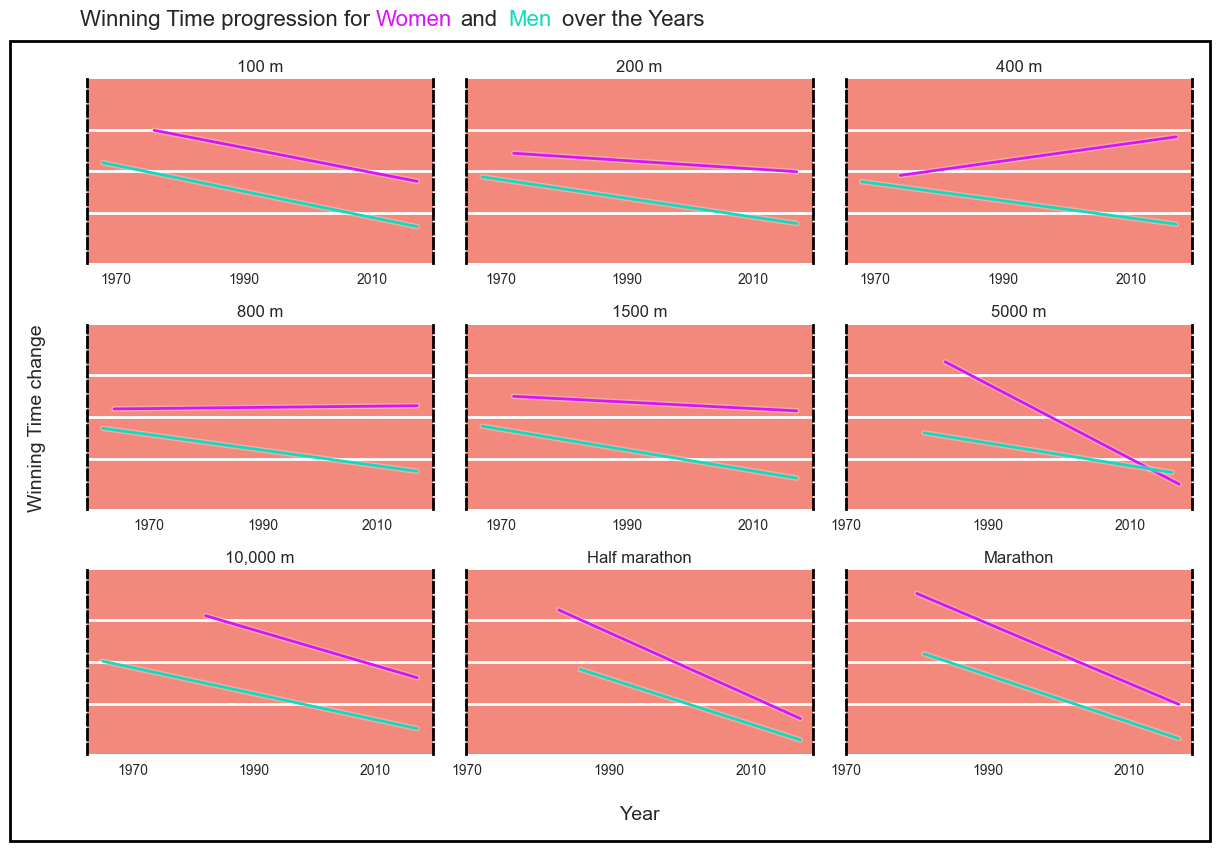

In [32]:
# Determine the number of rows and columns for the subplots
n = len(sorted_events)
ncols = 3  # Number of columns
nrows = 3  # Number of rows

number = 2

width = 6 * number
height = 4 * number

# Create a figure and axes objects
fig, axes = plt.subplots(nrows, ncols, figsize=(width, height))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generates a genderlist used for color, genderspecific plots and the legend
gen_list = ['Women', 'Men']
col_women = '#d614fc'
col_men = '#0fdbc0'

# Set a title for the entire figure
# Title parts for different colors
title_start = "Winning Time progression for"
title_colored_women = "Women"
title_middle = "and"
title_colored_men = "Men"
title_end = "over the Years"

# Set each part of the title with different colors
txt_pos_start = 0.3
txt_pos_women = txt_pos_start + 0.005
txt_pos_middle = txt_pos_women + 0.07
txt_pos_men = txt_pos_middle + 0.04
txt_pos_end = txt_pos_men + 0.045
txt_pos_vert = 1.015
fig.text(txt_pos_start, txt_pos_vert, title_start, ha='right', va='bottom', fontsize=16)
fig.text(txt_pos_women, txt_pos_vert, title_colored_women, ha='left', va='bottom', color=col_women, fontsize=16)
fig.text(txt_pos_middle, txt_pos_vert, title_middle, ha='left', va='bottom', fontsize=16)
fig.text(txt_pos_men, txt_pos_vert, title_colored_men, ha='left', va='bottom', color=col_men, fontsize=16)
fig.text(txt_pos_end, txt_pos_vert, title_end, ha='left', va='bottom', fontsize=16)

# Draw a custom border by adding a rectangle to the figure
border_width = 2  # Width of the border
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, edgecolor='black', facecolor='none', lw=border_width, clip_on=False)
fig.patches.append(rect)

# Adjust figure and axes to account for the border
x_min = border_width/15
x_max = 1-(border_width/15)
y_min = 1-(border_width/15)
y_max = border_width/15
fig.subplots_adjust(left=x_min, right=x_max,
                     top=y_min, bottom=y_max)

# Set common xticks
common_xticks = np.arange(1970, 2020, 20)
common_yticks = (25, 50, 75)

# Create subplots
for gen in gen_list:

    # Change the color of the plot for women and men
    if gen == 'Women':
        color = col_women
    if gen == 'Men':
        color = col_men

    for idx, event in enumerate(sorted_events):
        sorted_by_gender = df[df['Gender'] == gen]
        min_time_per_event = sorted_by_gender[sorted_by_gender['Event'] == event].groupby('Year')['Time_s'].min().reset_index()

        x = min_time_per_event['Year']
        y = min_time_per_event['Time_s']

        if gen == 'Women':
            multiply = 100
            add = 0.05
        else:
            multiply = 50
            add = -0.05


        min_y = np.min(y)
        max_y = np.max(y)

        normalized_y = (y - min_y) / (max_y - min_y) * multiply + add

        #Calculate m slope for regression line
        m, b = np.polyfit(x, y, 1)

        # Creat the regression plot
        ax = axes[idx]

        sns.regplot(data=min_time_per_event, x=x, y=normalized_y, ax=ax, line_kws={"color": "white", "lw": 4, "alpha" : 0.3}, scatter=False, ci=None)
        sns.regplot(data=min_time_per_event, x=x, y=normalized_y, ax=ax,
                    scatter_kws={'s': 25, 'color': color, 'edgecolor': 'black', 'linewidths': 0.5, 'alpha': 0.0},
                    line_kws={"color": color, "lw": 2, 'alpha': 1},
                    scatter=True, ci=None)
        ax.set_title(f'{event}')

        if idx in [7]:
            ax.set_xlabel('Year', labelpad=20, fontsize=14)
        else:
            ax.set_xlabel('')

        if idx in [3]:
            ax.set_ylabel('Winning Time change', labelpad=20, fontsize=14)
        else:
            ax.set_ylabel('')

        # # Add the custom legend
        ax.legend("False")

        # Remove the legend for all but the plot in the first row rightmost column
        # if idx != 4:
        ax.get_legend().remove()
        # Remove the legend title
        if ax.get_legend() is not None:
            ax.get_legend().set_title('')

        # Remove spines
        sns.despine(left=False, top=True, right=False, bottom=True, ax=ax)
        ax.yaxis.set_ticks_position('none')

        # Change properties for each spine
        for spine in ax.spines.values():
            spine.set_color("black")
            spine.set_linestyle("--")
            spine.set_linewidth(2)

        # Set and modify the bottom (x-axis) ticks and tick-labels
        ax.set_xticks(common_xticks)
        ax.tick_params(axis='x', labelsize='small', pad=0.5)

        # Set the left (y-axis) ticks
        ax.set_yticks(common_yticks)

        # Hide the left (y-axis) tick labels
        ax.set_yticklabels([])

        # Remove vertical grid lines
        ax.xaxis.grid(False)

        # Add subtle vertical grid
        ax.yaxis.grid(True, linestyle='-', linewidth=2, color='white')

        # Set the background color of the subplots
        ax.set_facecolor('#f2897c')  # Set background color

# Remove extra subplots if any
for idx in range(len(sorted_events), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
